In [1]:
import pandas as pd
test_data_df = pd.read_csv("short_data.csv")

If I have 11 numbers 

0     3     0     3     3     3     0     1     1     3     1

Then I can compute their average (1.6364) and their median (1) and their mode (3).

To find the average: (0+3+0+3+3+3+0+1+1+3+1)/11 = 18/11 which is approximately 1.6364.

To find the median, I first sort the numbers 

0     0     0     1     1     1     3     3     3    3     3

And I look to see which number is halfway along the list.  (The 6th number because 11 is odd.  If I had a list of 10 numbers, the median would be the average of the 5th and 6th numbers.)

To find the mode, I find out how often each value occurs:

0 --- occurs 3 times
1 --- occurs 3 times
3 --- occurs 5 times

Because 3 occurs the most, it's the mode.  Below are the numbers that pandas gives us.  Note that it doesn't give the mode!

In [2]:
test_data_df.describe()

,small
count,11.000000
mean,1.636364
std,1.361817
min,0.000000
25%,0.500000
50%,1.000000
75%,3.000000
max,3.000000


If I'd like to **look** at the data, I could plot it with each data point occurring at a new time (which makes sense if it were coming from something I measured over time).

Let's try that!

<AxesSubplot:>

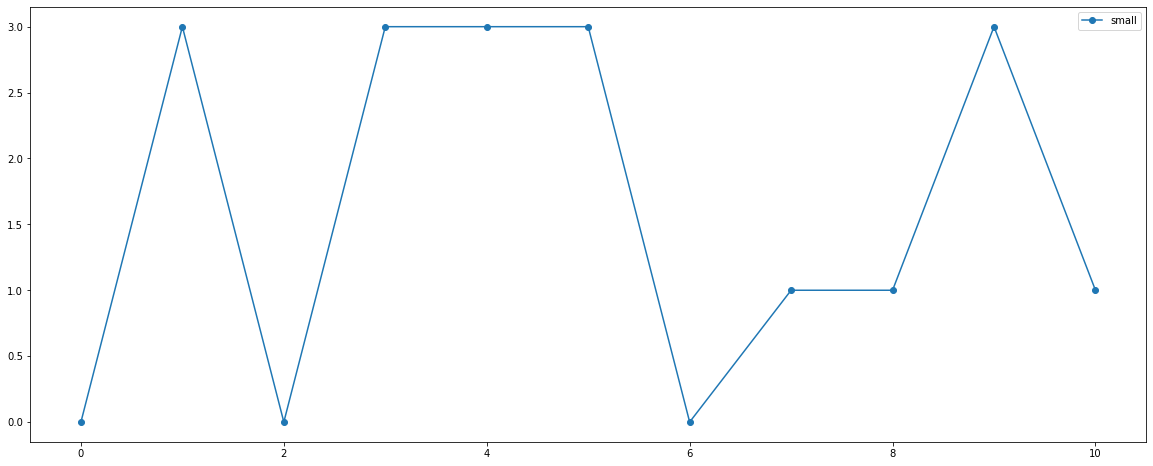

In [3]:
test_data_df.plot(figsize=(20,8),style='o-')

This is useful if I'm wanting to know how things change over time.  But it can also be useful to look at the data in terms of how frequently each value occurs.  We've seen

0 --- occurs 3 times

1 --- occurs 3 times

3 --- occurs 5 times

This can be visualized using pandas histogram option.   If I were doing a presentation for a conference, I would figure out how to get the bins centred at 0, 1, and 3.  Pandas divides [0,3] into ten bins and then it asks how many data points occur in each You can see that there's one bin for all values that occurred in [0,.3) --- there are three of them --- all values that occur in [.3,.6) --- there are none --- all values that occur in [.6,.9) --- there are none --- and so forth.  Ultimately there are three values in the bins [0,.3) and [.9,1.2) and five values that occur in the bin [2.7,3].

array([[<AxesSubplot:title={'center':'small'}>]], dtype=object)

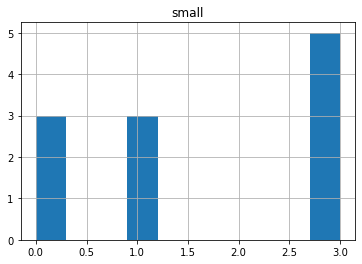

In [123]:
test_data_df.hist()

Now let's look at some data that I prepared before class.  I have 2,000 data points per column in the data frame.  First, let's load the data. 

In [4]:
test_data_df = pd.read_csv("sample_data_2000.csv")
test_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   constant    2000 non-null   float64
 1   rand        2000 non-null   float64
 2   randn_1     2000 non-null   float64
 3   randn_2     2000 non-null   float64
 4   randn_3     2000 non-null   float64
 5   other_rand  2000 non-null   float64
dtypes: float64(6)
memory usage: 93.9 KB


Let's look at the data in the constant column.  As you might suspect from the name... it's constant.  First let's graph it as if it were a function of time.  Then we can look at its histogram.

<AxesSubplot:>

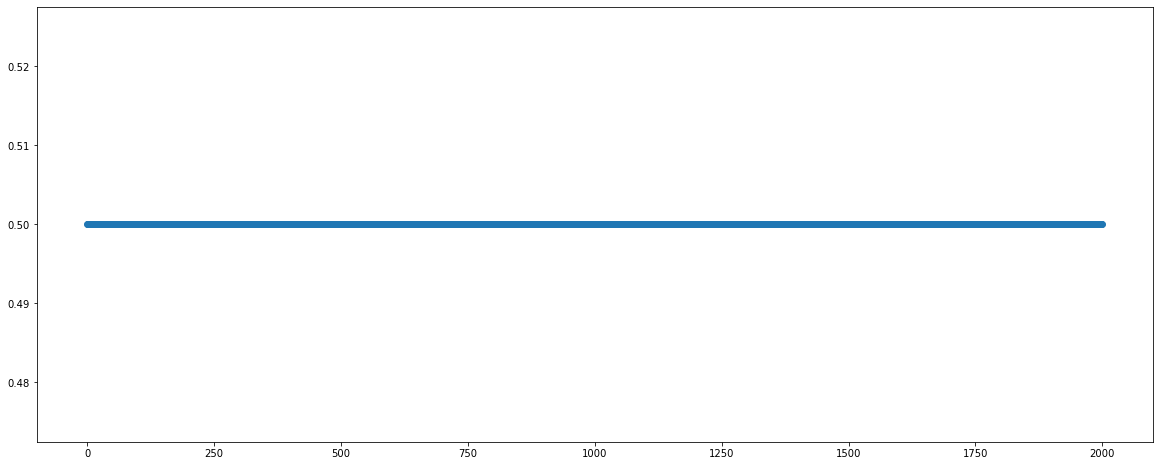

In [5]:
test_data_df['constant'].plot(figsize=(20,8),style='o-')

Great!  It's a line.  The histogram is precisely what we expect --- there's one bin with 2000 data points in it.

<AxesSubplot:>

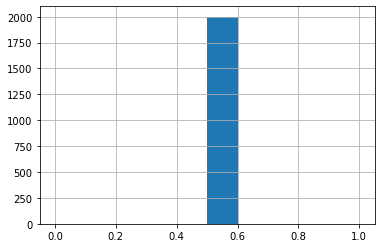

In [6]:
test_data_df['constant'].hist()

We can compute the mean and the median (both .5) and the standard deviation (0).  We'll get to the the standard deviation in a bit.

In [7]:
test_data_df['constant'].describe()

count    2000.0
mean        0.5
std         0.0
min         0.5
25%         0.5
50%         0.5
75%         0.5
max         0.5
Name: constant, dtype: float64

Now let's look at the next three columns of data, as if they were functions of time.

<AxesSubplot:>

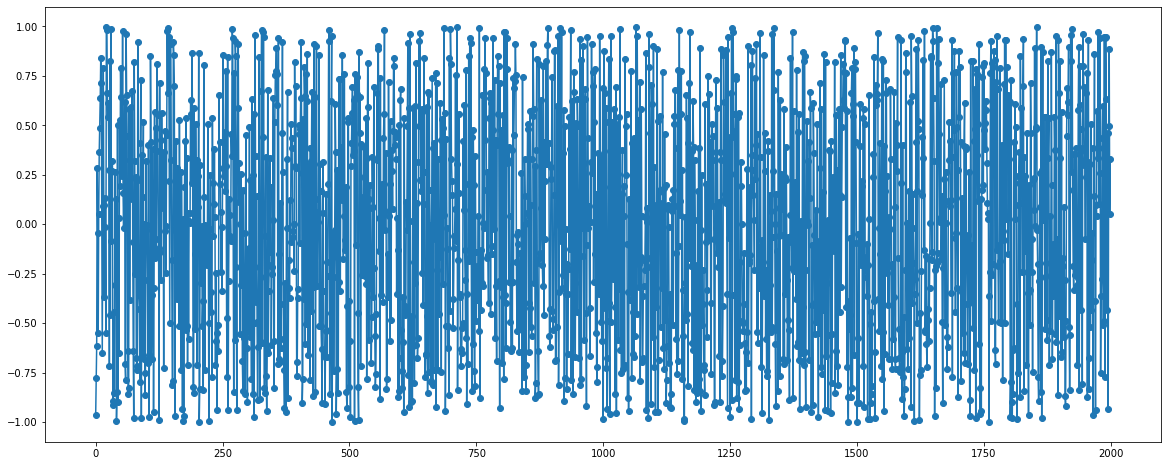

In [8]:
test_data_df['rand'].plot(figsize=(20,8),style='o-')

<AxesSubplot:>

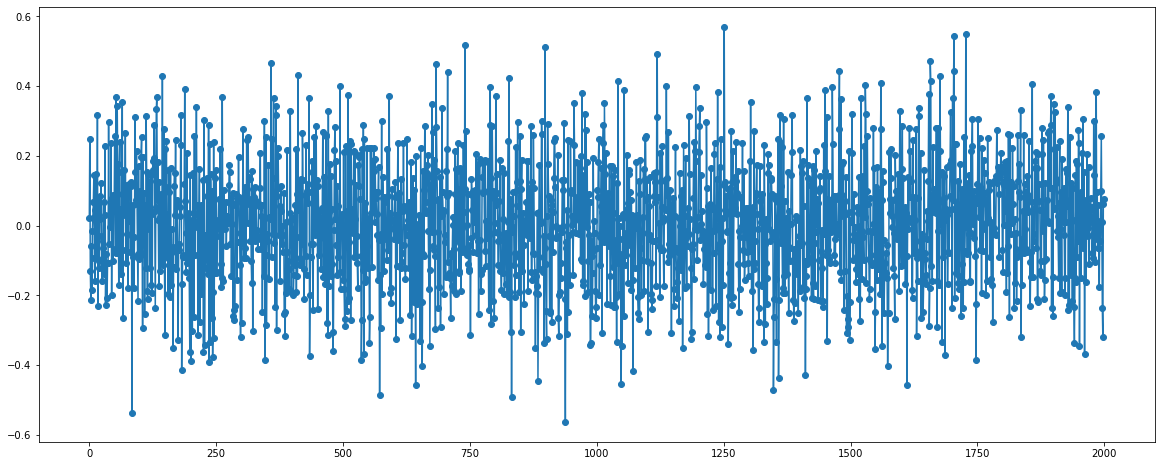

In [9]:
test_data_df['randn_1'].plot(figsize=(20,8),style='o-')

<AxesSubplot:>

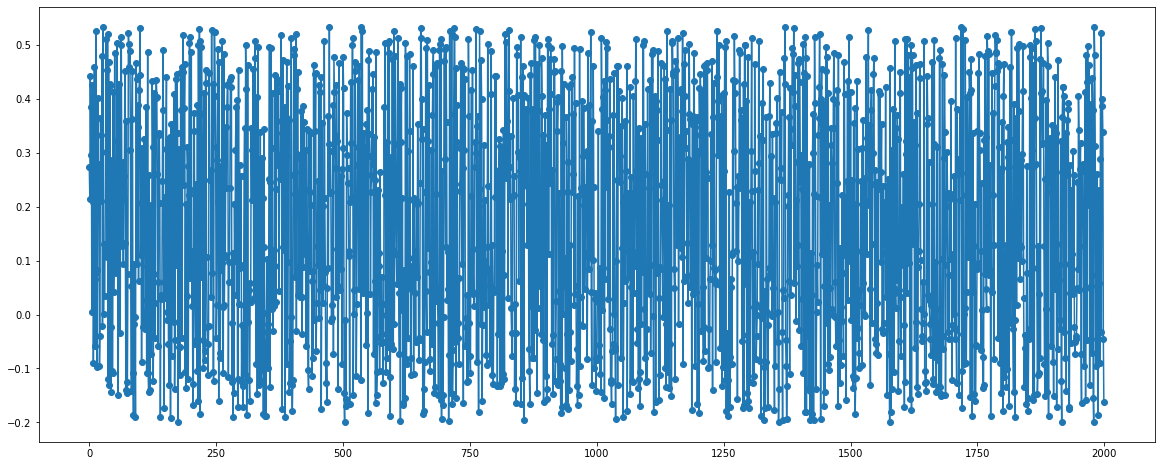

In [10]:
test_data_df['other_rand'].plot(figsize=(20,8),style='o-')

It's hard to say much about those figures.  The second one, "randn_1" seems to have more "outliers" than "rand" in that "rand" seems to live pretty solidly between -1 and 1.  The third one "other_rand" seems different from the first two but it's hard to say really how.

Let's look at their histograms.  First let's look at the histogram for "rand".

<AxesSubplot:>

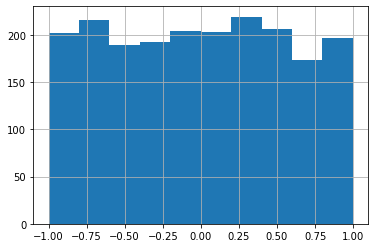

In [11]:
test_data_df['rand'].hist()

Okay this looks pretty coarse.  Putting 2000 data points into 10 bins may lead to some coarseness; we might miss information that we wished we had.  I'll increase the number of bins to 100.  (The number of bins to use is something you can play around with.)

I'll do this for all three of the data columns I looked at before.

<AxesSubplot:>

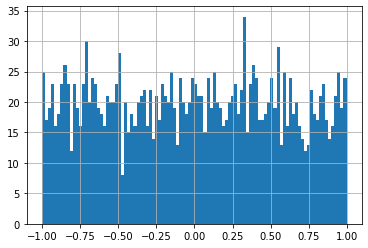

In [12]:
test_data_df['rand'].hist(bins=100)

<AxesSubplot:>

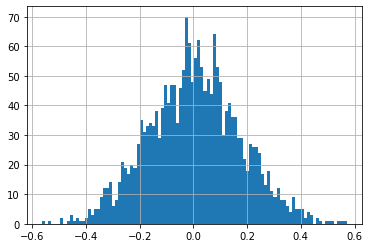

In [13]:
test_data_df['randn_1'].hist(bins=100)

<AxesSubplot:>

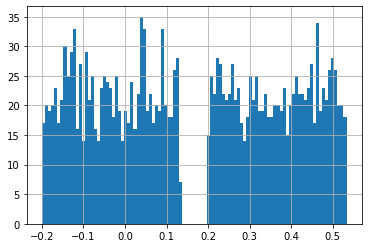

In [14]:
test_data_df['other_rand'].hist(bins=100)

Okay we can see that those data strings were really quite different now!  The first one "rand" I constructed by choosing numbers with equal likelihood from [-1,1].  The second one, "randn_1" I constructed by choosing numbers using a "normal distribution".  The third one, I constructed by choosing numbers from two separate distributions and then shuffling them together.  

We can see the mean, standard deviation, and median here.  If I'd taken infinitely many samples then the mean values would be 0, as it is the more samples I take the closer the mean is to zero.  

The standard devation is, in some sense, a measure of how "clumped" things are around the mean value.  From the distributions, we can see that "randn_1" is most clumped around 0 and "rand" is least clumped.  This is why the standard deviation is smallest for "randn_1" and largest for "rand".

In [148]:
test_data_df[['rand','randn_1','other_rand']].describe()

,rand,randn_1,other_rand
count,2000.000000,2000.000000,2000.000000
mean,-0.009491,0.004509,0.167129
std,0.575188,0.171352,0.221624
min,-0.999750,-0.562810,-0.199190
25%,-0.515390,-0.110082,-0.034455
50%,-0.002946,0.004984,0.166600
75%,0.478170,0.116635,0.367787
max,0.997890,0.570040,0.533210


Now let's look at "randn_1", "randn_2", and "randn_3".  First as time series and then as histograms.

As time series we see that "randn_1" has the smallest range of values above and below 0 and "randn_3" has the largest.

<AxesSubplot:>

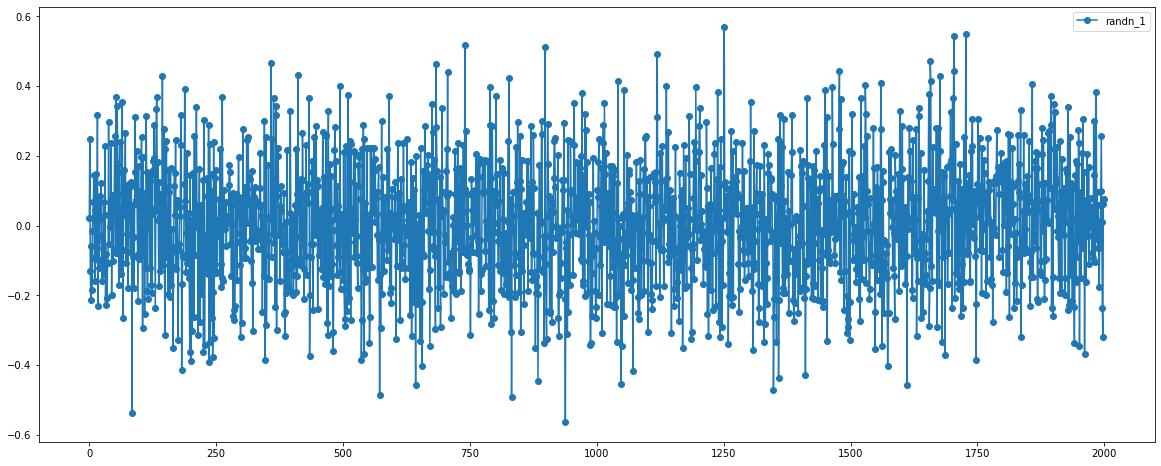

In [149]:
test_data_df[['randn_1']].plot(figsize=(20,8),style='o-')

<AxesSubplot:>

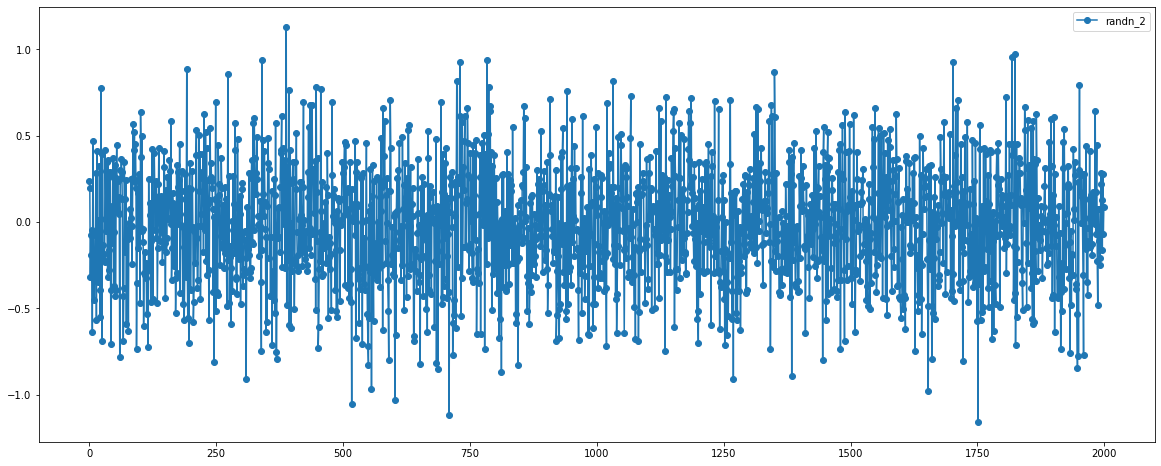

In [150]:
test_data_df[['randn_2']].plot(figsize=(20,8),style='o-')

<AxesSubplot:>

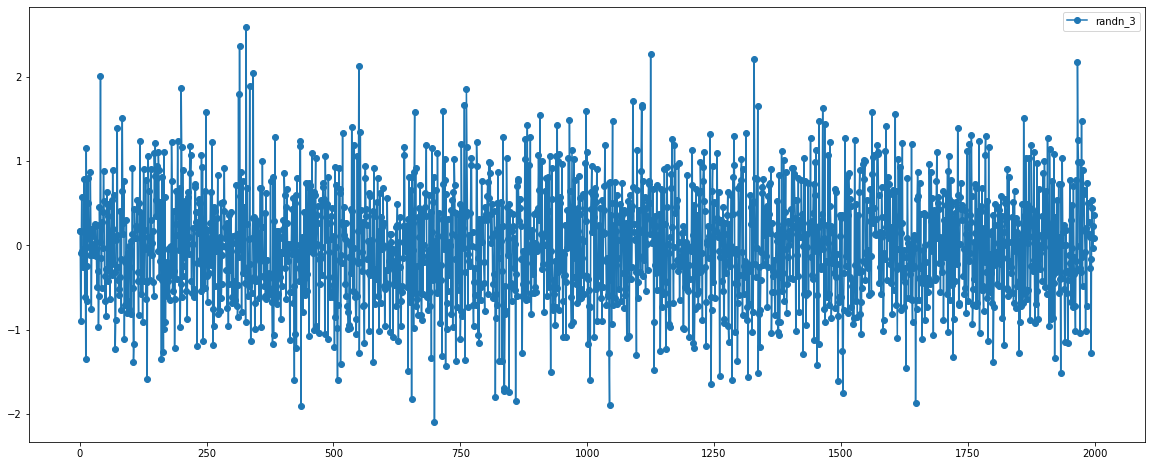

In [151]:
test_data_df[['randn_3']].plot(figsize=(20,8),style='o-')

Now let's look at their histograms!  We see that all three came from normal distributions w/ zero mean (trusssssst me....)

<AxesSubplot:>

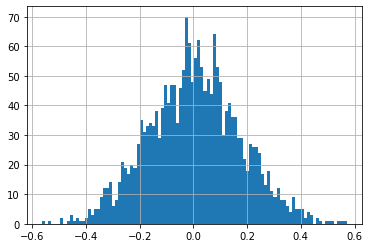

In [154]:
test_data_df['randn_1'].hist(bins=100)

<AxesSubplot:>

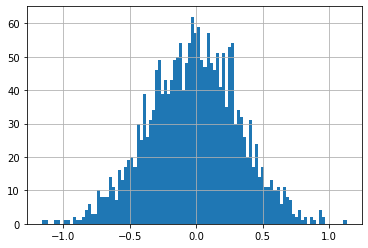

In [113]:
test_data_df['randn_2'].hist(bins=100)

<AxesSubplot:>

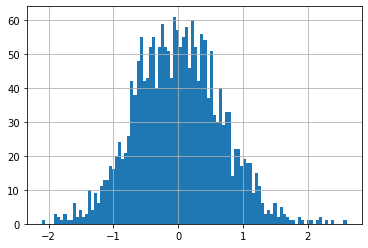

In [114]:
test_data_df['randn_3'].hist(bins=100)

If we look at all three at once we see that "randn_1" is the narrowest and "randn_3" is the widest.  

array([[<AxesSubplot:title={'center':'randn_1'}>,
        <AxesSubplot:title={'center':'randn_2'}>],
       [<AxesSubplot:title={'center':'randn_3'}>, <AxesSubplot:>]],
      dtype=object)

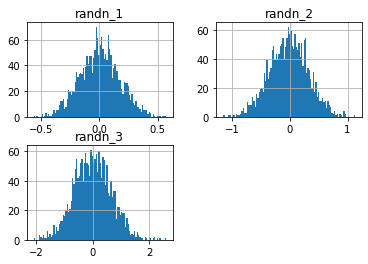

In [155]:
test_data_df[['randn_1','randn_2','randn_3']].hist(bins=100)

We can see that ordering when we look at their standard deviations! :)

In [156]:
test_data_df[['randn_1','randn_2','randn_3']].describe()

,randn_1,randn_2,randn_3
count,2000.000000,2000.000000,2000.000000
mean,0.004509,-0.017577,0.000540
std,0.171352,0.335955,0.659843
min,-0.562810,-1.158600,-2.097700
25%,-0.110082,-0.250653,-0.461128
50%,0.004984,-0.010600,-0.004489
75%,0.116635,0.213702,0.431673
max,0.570040,1.131800,2.596100
